We start importing pandas libary and loading data.

In [1]:
import pandas as pd
data = pd.read_csv("../data/raw/measures/H-DHT22-measures.csv",usecols = ["value","time"], parse_dates=['time'])

Try to find null and nan data in value. But not has null values

In [2]:
print('Null values: ', pd.isnull(data.value).sum())
print('Nan values', pd.isna(data.value).sum())

Null values:  0
Nan values 0


With plot we can preview an have an idea that this sensor it was running bad during a long time.


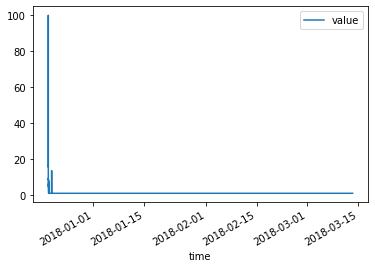

In [3]:
data.plot.line(x = 'time', y = 'value')


Observing plot we can say that values out of range (8,1) are incorrect.

So filtering this we can have some values, this file have a lot of time without valid data

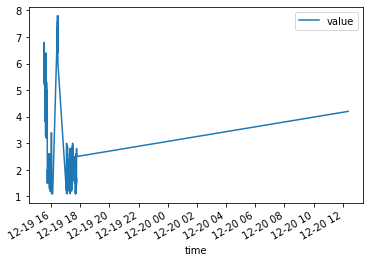

In [4]:
data = data[data.value.lt(8)]
data = data[data.value.ne(1)]
data.plot.line(x = 'time', y = 'value')

Finally we write data to file to work after with this.

In [12]:
data.to_json('../data/processed/H-DHT22-measures.json', orient='records', date_format='iso', indent=2)


In [5]:
# We view that for a long time the sersor always mark the same temp.
# We can consideer all values offsite of range 1 - 0 can be ommited because it can considerer fails.
# So that we have a lot of time without data.
# import pandas as pd
# import date
#
# dtypes = {'value': 'float', 'time': 'datetime'}
# parse_dates = ['time']
# data1 = pd.read_csv('../data/raw/measures/H-DHT22-measures.csv',usecols = ['value','time'], parse_dates=parse_dates)


#time_incorrect = datetime.datetime(2017,12,19,21)
#time_incorrect = pd.Timestamp(2017,12,19,21)
#data_filtered = data_filtered[data_filtered.time < '2017-12-19T21']
#data_filtered = data_filtered[data_filtered.time > '2017-12-19T15']

#data_filtered.plot.line(x = 'time', y = 'value')

#
# import pandas as pd
#
# dtypes = {'value': 'float', 'time': 'datetime'}
# parse_dates = ['time']
# data1 = pd.read_csv('../data/raw/measures/H-DHT22-measures.csv',usecols = ['value','time'], parse_dates=parse_dates)
#
# data_filtered = data1[data1.value < 50.0]
# data_filtered.plot.line(x = 'time', y = 'value')
